# <center>      HOUSE PRICE PREDICTION  </center>

<center>

### Objective

Develop a predictive model using a housing dataset incorporating variables such as square footage and number of bedrooms. Train the model to accurately forecast housing prices, enabling it to provide reliable estimations for the cost of new houses based on their features.


</center>


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [4]:
df =pd.read_csv ('E:\\TechnoHacks project\\1.kc_house_data.csv')

In [5]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
df.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

In [7]:
df.shape 

(21613, 21)

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Data Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Data Visualization

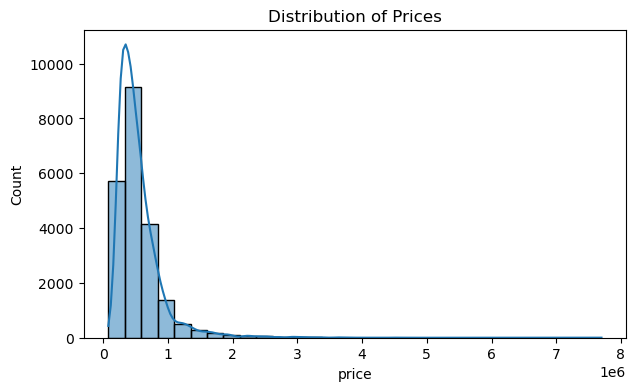

In [13]:
# Histogram for price distribution

plt.figure(figsize=(7, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

Text(0.5, 1.0, 'Scatter Plot: Price vs Bedrooms')

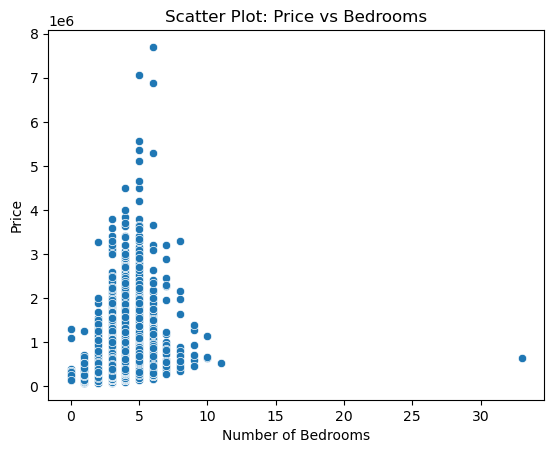

In [14]:
# Scatter Plot: Price vs Bedrooms

sns.scatterplot(data=df, x='bedrooms', y='price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs Bedrooms')

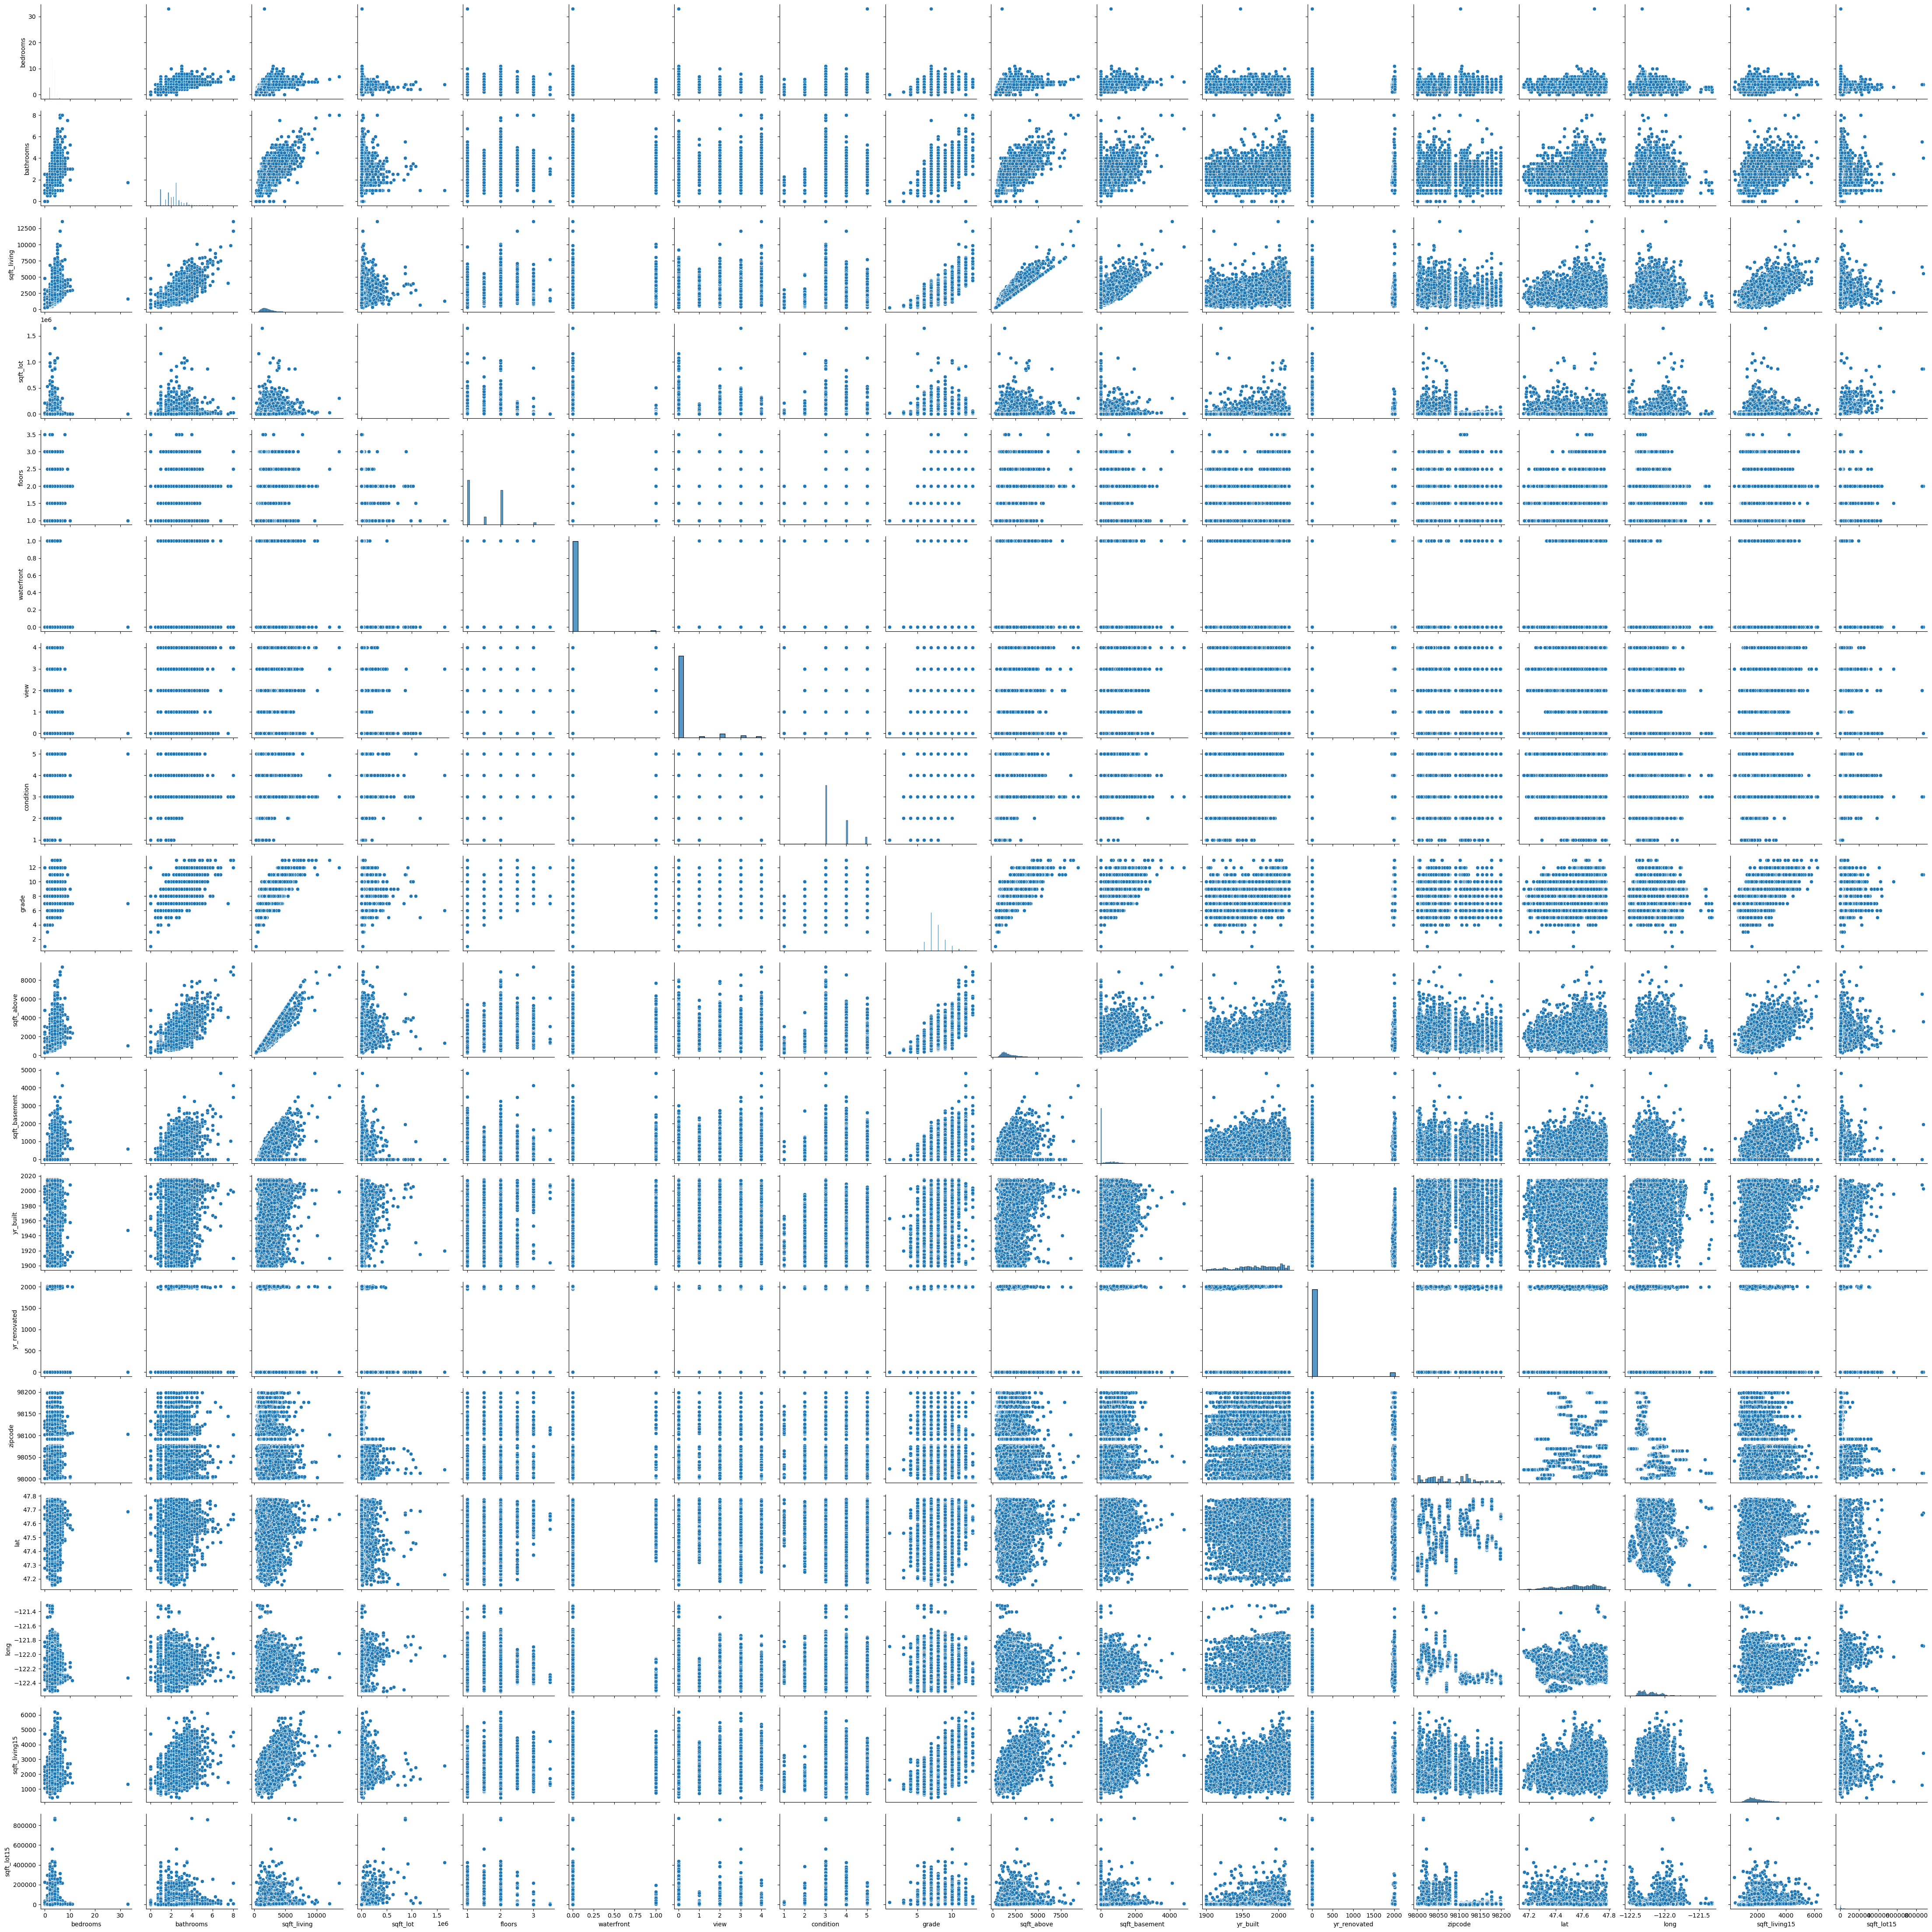

In [15]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                 'sqft_living15', 'sqft_lot15']])
plt.show()

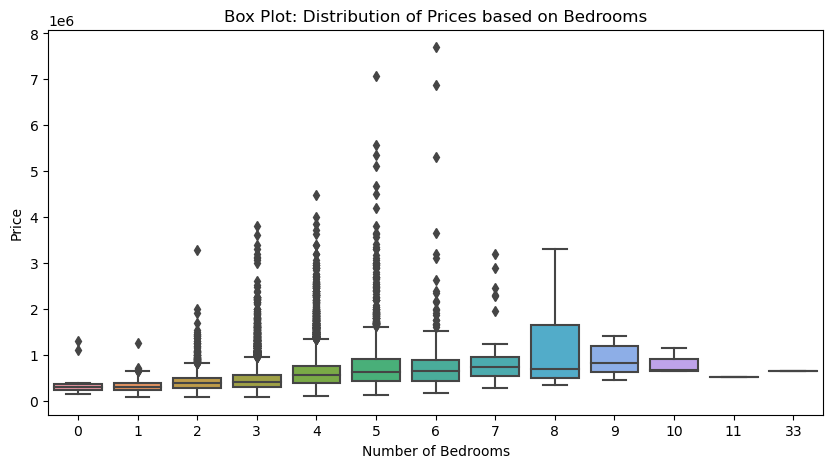

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot: Distribution of Prices based on Bedrooms')
plt.show()

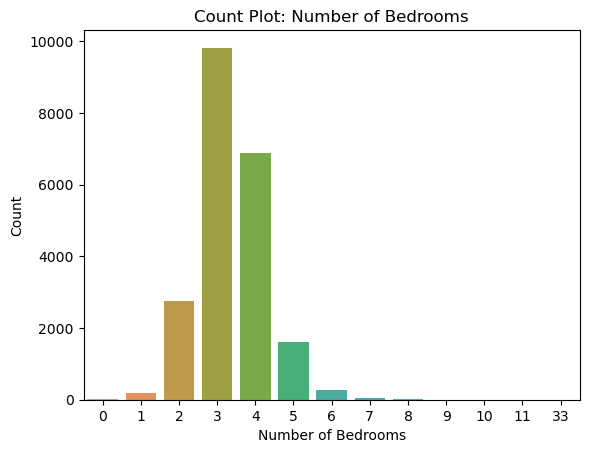

In [17]:
# 'Count Plot: Number of Bedrooms

sns.countplot(x='bedrooms',  data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Count Plot: Number of Bedrooms')
plt.show()

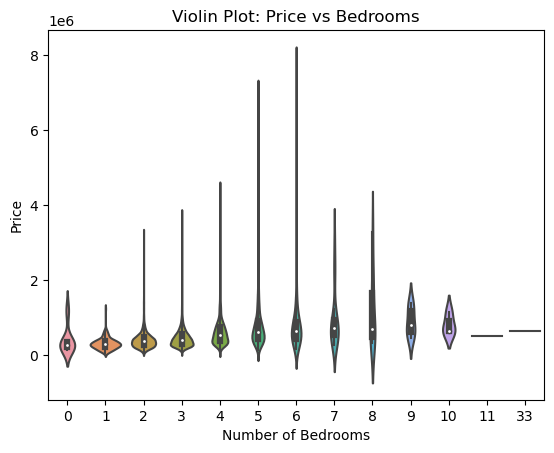

In [18]:
# Violin Plot: Price vs Bedrooms

sns.violinplot(x='bedrooms', y='price', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Violin Plot: Price vs Bedrooms')
plt.show()

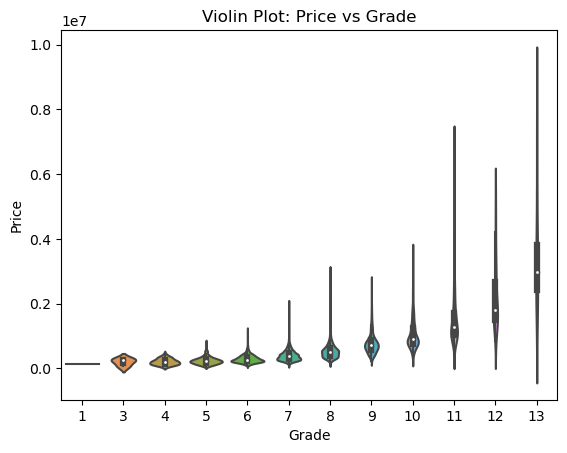

In [19]:
# Violin plot for 'grade' vs 'price'

sns.violinplot(x='grade', y='price', data=df)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Violin Plot: Price vs Grade')
plt.show()

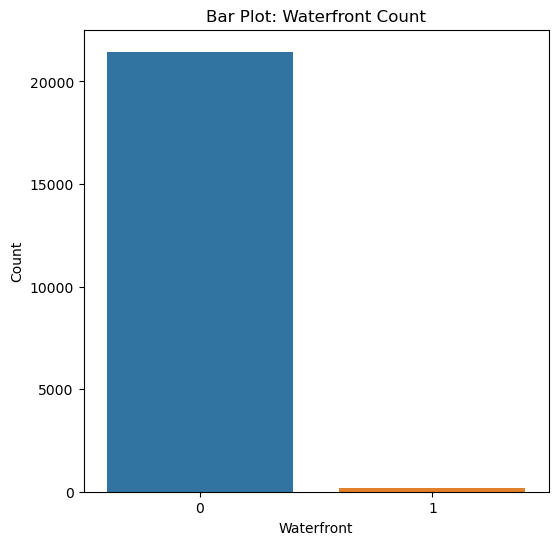

In [20]:
 # Bar plot: Waterfront Count
    
plt.figure(figsize=(6, 6))
sns.countplot(x='waterfront', data=df)
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.title('Bar Plot: Waterfront Count')
plt.show()

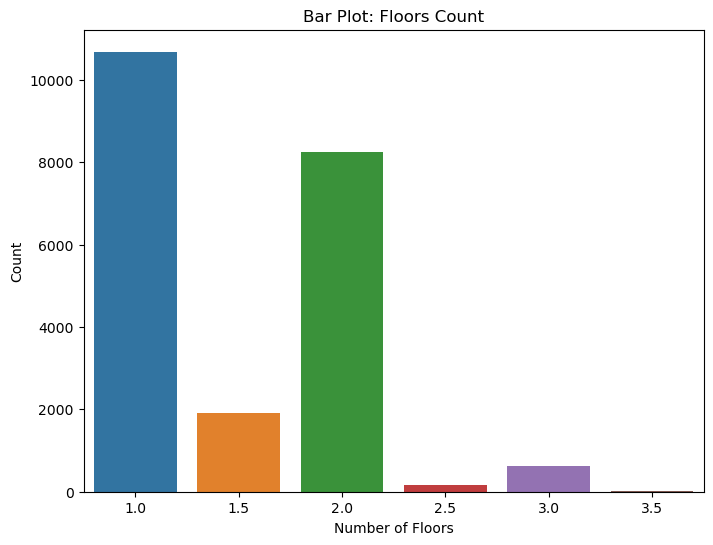

In [21]:
# Bar plot: Floors Count

plt.figure(figsize=(8, 6))
sns.countplot(x='floors', data=df)
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.title('Bar Plot: Floors Count')
plt.show()

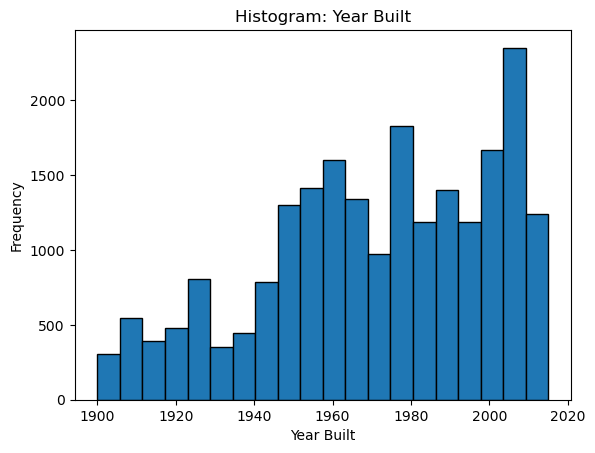

In [22]:
# Histogram for 'yr_built'

plt.hist(df['yr_built'], bins=20, edgecolor='black')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Histogram: Year Built')
plt.show()

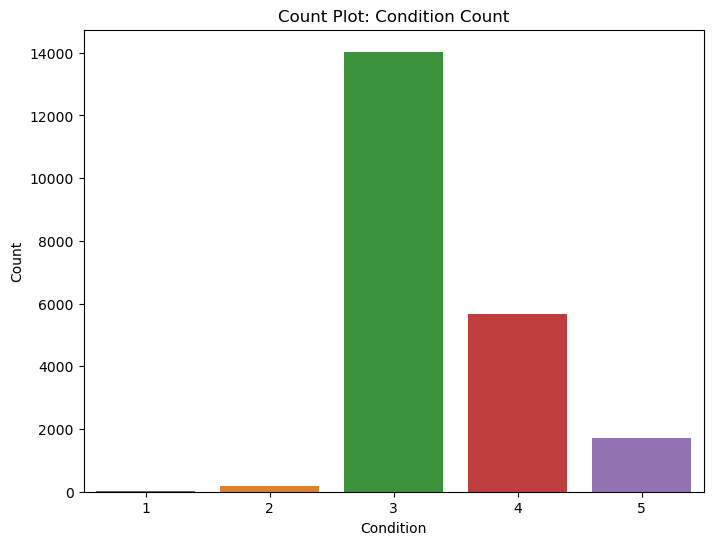

In [23]:
 # Bar plot: Condition Count
    
plt.figure(figsize=(8, 6))
sns.countplot(x='condition', data=df)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Count Plot: Condition Count')
plt.show()

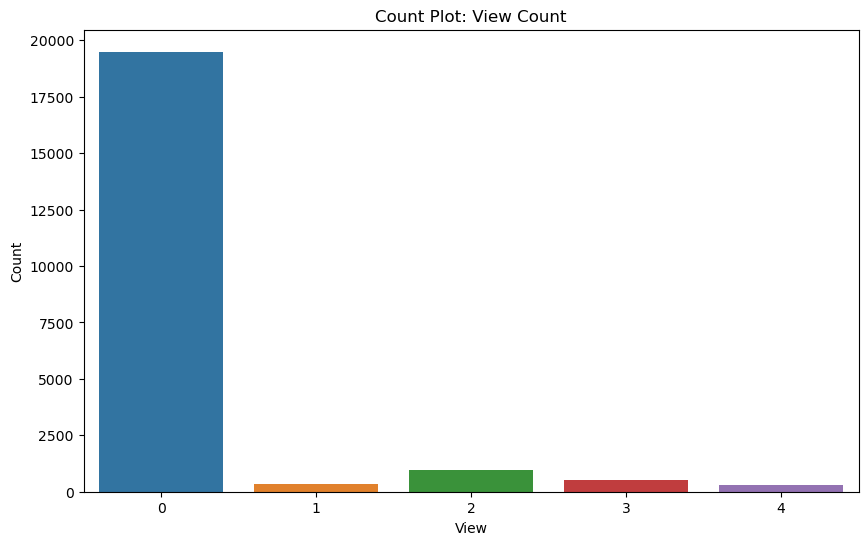

In [24]:
#Count Plot: View Count

plt.figure(figsize=(10, 6))
sns.countplot(x='view', data=df)
plt.xlabel('View')
plt.ylabel('Count')
plt.title('Count Plot: View Count')
plt.show()

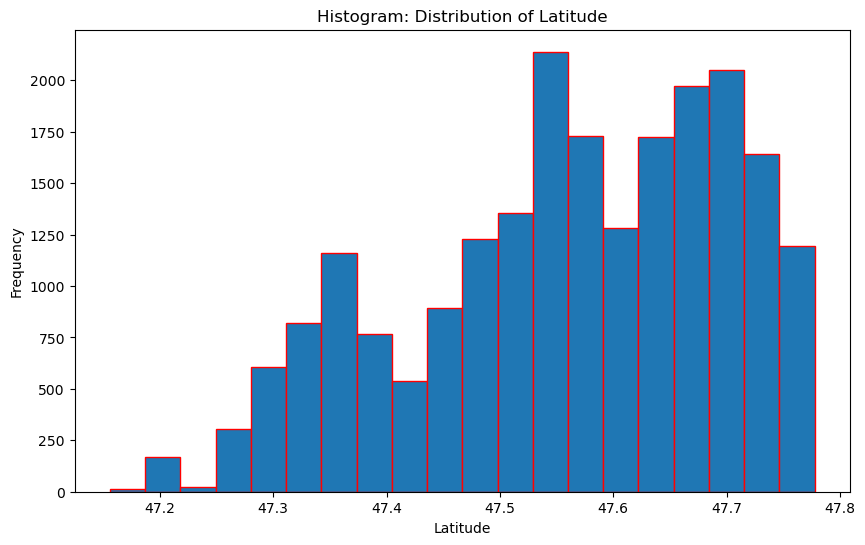

In [25]:
# Histogram: Distribution of Latitude

plt.figure(figsize=(10, 6))
plt.hist(df['lat'], bins=20, edgecolor='Red')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Latitude')
plt.show()

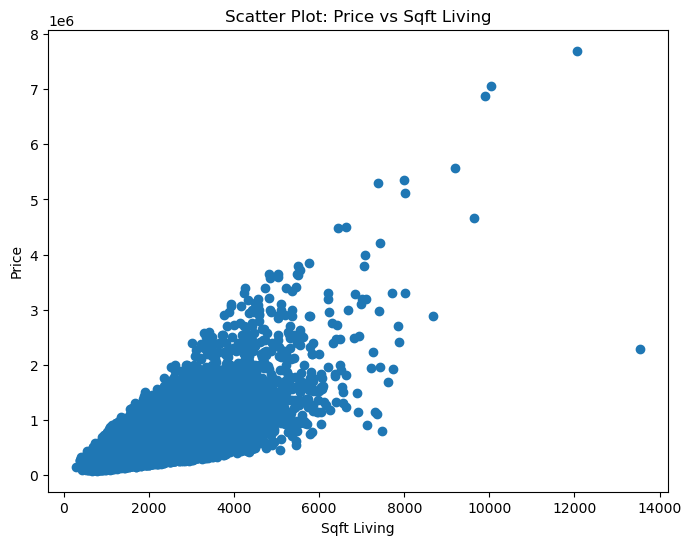

In [26]:
# Scatter plot: Price vs Sqft Living

plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs Sqft Living')
plt.show()

In [27]:
correlation = df.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7112\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [28]:
correlation

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

<Axes: >

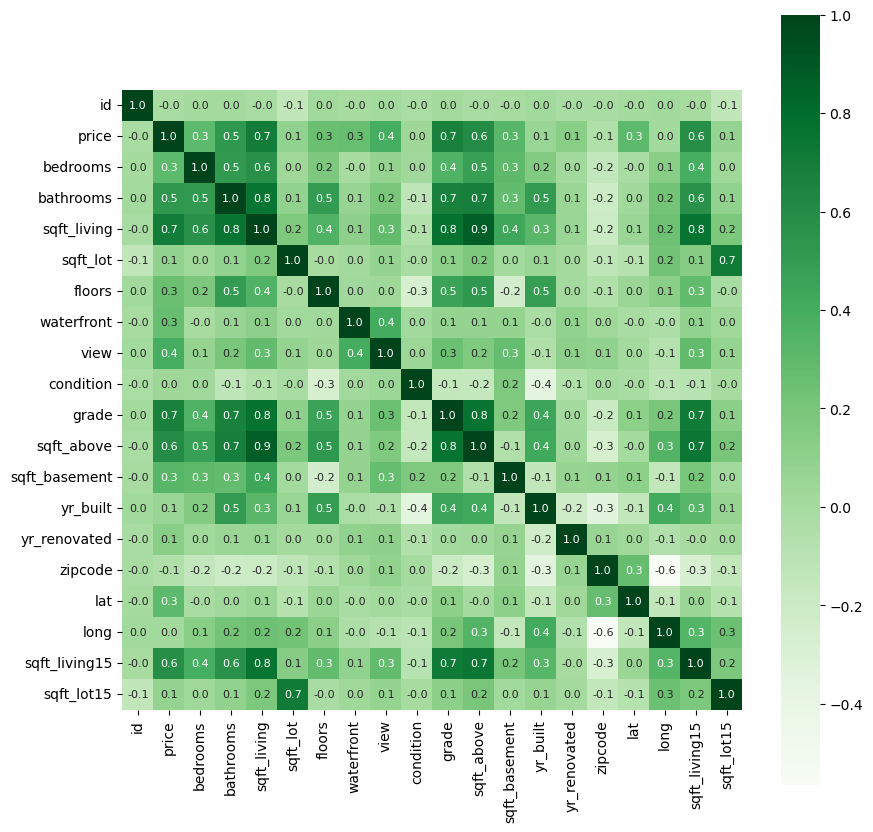

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap (correlation, cbar=True ,fmt='.1f',square= True,annot=True,annot_kws={'size':8},cmap='Greens')

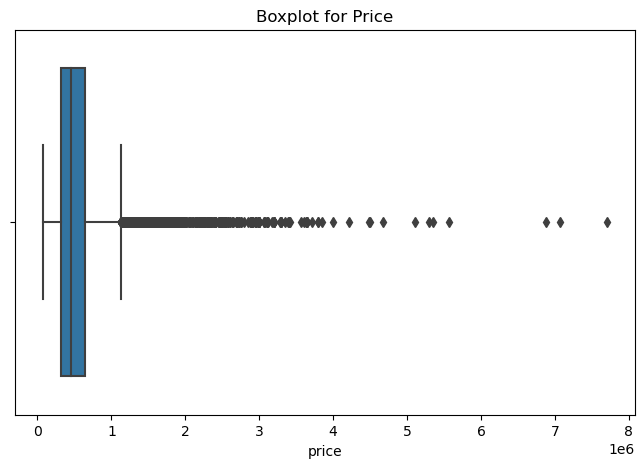

In [30]:
# Box plot to identify outliers in price

plt.figure(figsize=(8, 5))
sns.boxplot(x='price', data=df)
plt.title('Boxplot for Price')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

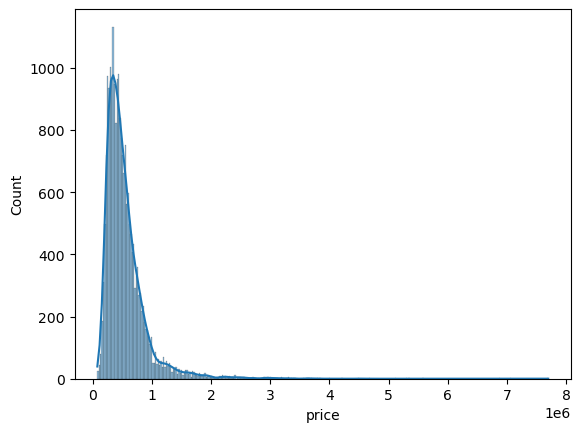

In [31]:
sns.histplot(df.price, kde= True)

In [32]:
# FEATURE column                                                                  #-----80 % Data is training

x = df.drop(['id','date','price'], axis=1)

In [33]:
# TARGET column                                                                #-----20 % Data is testing
y = df['price']
                               # y = df1.columns.difference(['x'])----------# Features are all columns except 'price'

In [34]:
x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21608          3      8        1530              0      2009             0   
21609          3      8        2310              0      2014             0   
21610          3      7        1020              0      2009             0   
21611          3      8        1600              0      2004             0   
21612          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
0        98178  47.5112 -122.257           1340        5650  
1        98125  47.7210 -122.319           1690        7639  
2        98028  47.7379 -122.233           2720        8062  
3        98136  47.5208 -122.393           1360        5000  
4        98074  47.6168 -122.045           1800        7503  
...        ...      ...      ...            ...         ...  
21608    98103  47.6993 -122.346           1530        1509  
21609    98146  47.5107 -122.362           1830        7200  
21610    98144  47.5944 -122.299           1020        2007  
21611    98027  47.5345 -122.069           1410        1287  
21612    98144  47.5941 -122.299           1020        1357  

[21613 rows x 18 columns]

In [35]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Model Selection

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train , y_test =train_test_split(x,y, test_size=0.2,random_state=42)

In [38]:
print(x_train.shape, y_train.shape)


(17290, 18) (17290,)


In [39]:
x_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6325          3       1.75         1780     13095     1.0           0     0   
13473         2       1.00         1000      3700     1.0           0     0   
17614         3       1.00         1080      7486     1.5           0     0   
16970         3       2.25         2090      7500     1.0           0     0   
20868         2       2.50         1741      1439     2.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
11964         3       1.50         1000      6914     1.0           0     0   
21575         3       2.50         3087      5002     2.0           0     0   
5390          3       2.50         2120      4780     2.0           0     0   
860           1       0.75          380     15000     1.0           0     0   
15795         4       2.50         3130      5999     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
6325           4      9        1780              0      1983             0   
13473          3      6         800            200      1929             0   
17614          3      6         990             90      1942             0   
16970          4      7        1280            810      1977             0   
20868          3      8        1446            295      2007             0   
...          ...    ...         ...            ...       ...           ...   
11964          3      7        1000              0      1947             0   
21575          3      8        3087              0      2014             0   
5390           3      7        2120              0      2004             0   
860            3      5         380              0      1963             0   
15795          3      7        3130              0      2006             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
6325     98042  47.3670 -122.152           2750       13095  
13473    98118  47.5520 -122.290           1270        5000  
17614    98146  47.4838 -122.335           1170        7800  
16970    98031  47.3951 -122.172           1800        7350  
20868    98034  47.7043 -122.209           2090       10454  
...        ...      ...      ...            ...         ...  
11964    98125  47.7144 -122.319           1000        6947  
21575    98023  47.2974 -122.349           2927        5183  
5390     98053  47.6810 -122.032           1690        2650  
860      98168  47.4810 -122.323           1170       15000  
15795    98042  47.3837 -122.099           3020        5997  

[17290 rows x 18 columns]

In [40]:
x_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
735           4       2.25         2070      8893     2.0           0     0   
2830          5       3.00         2900      6730     1.0           0     0   
4106          4       2.50         3770     10893     2.0           0     2   
16218         3       3.50         4560     14608     2.0           0     2   
19964         3       2.50         2550      5376     2.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
13674         3       1.75         1250      7710     1.0           0     0   
20377         3       2.75         2830      3496     2.0           0     0   
8805          4       2.50         2434      4400     2.0           0     0   
10168         4       1.75         2250     10108     1.0           0     0   
2522          4       2.50         2570     11473     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
735            4      8        2070              0      1986             0   
2830           5      8        1830           1070      1977             0   
4106           3     11        3770              0      1997             0   
16218          3     12        4560              0      1990             0   
19964          3      9        2550              0      2004             0   
...          ...    ...         ...            ...       ...           ...   
13674          4      7        1250              0      1947             0   
20377          3      8        2830              0      2012             0   
8805           3      8        2434              0      2007             0   
10168          4      8        2250              0      1967             0   
2522           3      8        2570              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
735      98058  47.4388 -122.162           2390        7700  
2830     98115  47.6784 -122.285           2370        6283  
4106     98006  47.5646 -122.129           3710        9685  
16218    98034  47.6995 -122.228           4050       14226  
19964    98052  47.6647 -122.083           2250        4050  
...        ...      ...      ...            ...         ...  
13674    98155  47.7623 -122.317           1340        7710  
20377    98029  47.5606 -122.011           2160        3501  
8805     98001  47.2874 -122.283           2434        4400  
10168    98008  47.5922 -122.118           2050        9750  
2522     98003  47.2809 -122.296           2430        5997  

[4323 rows x 18 columns]

In [41]:
y_train

6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 17290, dtype: float64

In [42]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
13674     338000.0
20377     673000.0
8805      285000.0
10168     605000.0
2522      356500.0
Name: price, Length: 4323, dtype: float64

# Model Training

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [46]:
y_predicted =model.predict(x_test)

In [47]:
model.score(x_test,y_test)  

0.7011904448878459

In [48]:
print(y_predicted)

[ 461209.94695859  752443.51006948 1238489.80205808 ...  423101.46384867
  617785.61416854  442344.46084988]


In [49]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})

Actual     Predicted
735     365000.0  4.612099e+05
2830    865000.0  7.524435e+05
4106   1038000.0  1.238490e+06
16218  1490000.0  1.662424e+06
19964   711000.0  7.348896e+05
...          ...           ...
13674   338000.0  4.764350e+05
20377   673000.0  6.149014e+05
8805    285000.0  4.231015e+05
10168   605000.0  6.177856e+05
2522    356500.0  4.423445e+05

[4323 rows x 2 columns]

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,y_predicted)

0.7011904448878459

In [52]:
df.head(2)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

# Now our Model is ready to use
# if we gave input to the model ,then model will answer HOUSE price

In [54]:

data = [['3','1.00','1180','5650','1.0','0','0','3','7','1180','0','1955','0','98178','47.5112','-122.257','1340','565']]
df = pd.DataFrame(data, columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                                 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
                                 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

predictions = model.predict(df)

print("Predictions of HOUSE price:", predictions)


Predictions of HOUSE price: [212626.49538522]
